*****************************************************************************

---



---



# **1) Apply Naive Bayes classifier on the dataset given in the file “dataset_lab2.csv” using python to answer the given queries.**

In [ ]:
# removing future warnings : suppress few warning that comes up in the jupyter kernal them
import warnings
from sklearn.metrics._classification import UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

# for data manipulation: the process of changing or altering data in order to make it more readable and organized 
import pandas as pd
import numpy as np 

# for model evaluation metrics
from sklearn.metrics import classification_report 

# for scaling the data of numerical columns
from sklearn.preprocessing import StandardScaler


# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import BernoulliNB


Gaussian Naïve Bayes Algorithm 

In [ ]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]      
        numerator = np.exp(((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy   

#Gaussian Naïve Bayes 

In [ ]:
# Importing the data
df_inp_gaussian = pd.read_csv('/content/dataset_lab2.csv')
df_inp_gaussian.head()

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,S01,80,61,65,70,593,No,YES
1,S02,64,61,65,64,450,Yes,YES
2,S03,69,72,69,80,480,Yes,YES
3,S04,85,59,67,66,620,No,NO
4,S05,64,66,65,65,423,Yes,NO


In [ ]:
# checking overview of the data
print("*"*5,'Discription',"*"*5)
display(df_inp_gaussian.describe())

print("*"*5,'Correlations',"*"*5)
display(df_inp_gaussian.corr())

print("*"*5,'Is Null',"*"*5)
display(df_inp_gaussian.isna().sum())

***** Discription *****


,Class 10,Class 12,UG,PG,GATE Score
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,70.600000,64.300000,69.200000,73.300000,533.300000
std,9.191784,9.933669,6.338594,9.487419,95.827449
min,56.000000,52.000000,63.000000,64.000000,382.000000
25%,64.250000,59.500000,65.000000,66.500000,457.500000
50%,69.500000,63.000000,68.000000,69.000000,556.500000
75%,77.750000,66.000000,71.250000,78.750000,599.750000
max,85.000000,87.000000,85.000000,92.000000,670.000000


***** Correlations *****


,Class 10,Class 12,UG,PG,GATE Score
Class 10,1.000000,0.353139,-0.231136,0.150601,0.155687
Class 12,0.353139,1.000000,-0.579859,0.145130,-0.682237
UG,-0.231136,-0.579859,1.000000,0.584592,0.657874
PG,0.150601,0.145130,0.584592,1.000000,0.074196
GATE Score,0.155687,-0.682237,0.657874,0.074196,1.000000


***** Is Null *****


Student ID          0
Class 10            0
Class 12            0
UG                  0
PG                  0
GATE Score          0
Work Exp            0
Admission Result    0
dtype: int64

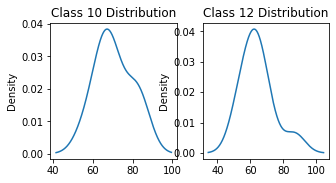

In [ ]:
# Checking distribution of the Class 10	Class 12	UG	PG	GATE Score
from matplotlib import pyplot as plt

fig, (axs1,axs2) = plt.subplots(1, 2)

df_inp_gaussian['Class 10'].plot.kde(figsize=(5,2.5),ax=axs1,title='Class 10 Distribution')
df_inp_gaussian['Class 12'].plot.kde(figsize=(5,2.5),ax=axs2,title='Class 12 Distribution')


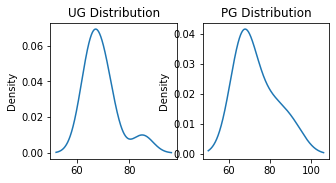

In [ ]:
from matplotlib import pyplot as plt

fig, (axs3,axs4) = plt.subplots(1, 2)

df_inp_gaussian['UG'].plot.kde(figsize=(5,2.5),ax=axs3,title='UG Distribution')
df_inp_gaussian['PG'].plot.kde(figsize=(5,2.5),ax=axs4,title='PG Distribution')


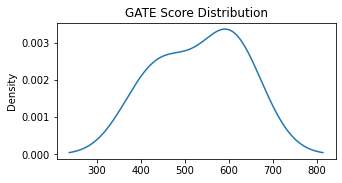

In [ ]:
from matplotlib import pyplot as plt

fig, (axs5) = plt.subplots(1)

df_inp_gaussian['GATE Score'].plot.kde(figsize=(5,2.5),ax=axs5,title='GATE Score Distribution')

In [ ]:
# Feature Engineering

# 1. Handling Missing Data
# 2. Handling Categorical Data
# 3. Feature Scaling

# 3. Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_inp_gaussian[['Class 10','Class 12','UG','PG','GATE Score']]=scaler.fit_transform(df_inp_gaussian[['Class 10',
      'Class 12','UG','PG','GATE Score']])
df_inp_gaussian.head()

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,S01,0.827586,0.257143,0.090909,0.214286,0.732639,No,YES
1,S02,0.275862,0.257143,0.090909,0.000000,0.236111,Yes,YES
2,S03,0.448276,0.571429,0.272727,0.571429,0.340278,Yes,YES
3,S04,1.000000,0.200000,0.181818,0.071429,0.826389,No,NO
4,S05,0.275862,0.400000,0.090909,0.035714,0.142361,Yes,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_inp_gaussian = df_inp_gaussian.rename({'Admission Result': 'AdmissionResult'}, axis=1)  


le_AdmissionResult = LabelEncoder()
df_inp_gaussian.AdmissionResult = le_AdmissionResult.fit_transform(df_inp_gaussian.AdmissionResult)
print(df_inp_gaussian.head())
df = df_inp_gaussian

  Student ID  Class 10  Class 12        UG        PG  GATE Score Work Exp  \
0        S01  0.827586  0.257143  0.090909  0.214286    0.732639       No   
1        S02  0.275862  0.257143  0.090909  0.000000    0.236111      Yes   
2        S03  0.448276  0.571429  0.272727  0.571429    0.340278      Yes   
3        S04  1.000000  0.200000  0.181818  0.071429    0.826389       No   
4        S05  0.275862  0.400000  0.090909  0.035714    0.142361      Yes   

   AdmissionResult  
0                1  
1                1  
2                1  
3                0  
4                0  


In [ ]:
# Model Creation

# 1. Spliting Featurea and Targets
X=df_inp_gaussian[['Class 10','Class 12','UG','GATE Score']]
y=df_inp_gaussian['AdmissionResult'].values



In [ ]:
print("*"*5,'X_train',"*"*5)
X_train = X
print(X_train)
y_train = y
print("*"*5,'y_train',"*"*5)
print(y_train)

***** X_train *****
   Class 10  Class 12        UG  GATE Score
0  0.827586  0.257143  0.090909    0.732639
1  0.275862  0.257143  0.090909    0.236111
2  0.448276  0.571429  0.272727    0.340278
3  1.000000  0.200000  0.181818    0.826389
4  0.275862  0.400000  0.090909    0.142361
5  0.482759  0.400000  0.409091    0.722222
6  0.517241  0.000000  1.000000    1.000000
7  0.000000  0.057143  0.409091    0.489583
8  0.896552  1.000000  0.000000    0.000000
9  0.310345  0.371429  0.272727    0.763889
***** y_train *****
[1 1 1 0 0 1 0 0 0 1]


##Test Data

In [ ]:
df1_inp_gaussian = pd.read_csv('/content/testset_lab2.csv')
df1_inp_gaussian

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,S11,59,80,77,70,550,No,NO
1,S12,54,78,68,64,593,Yes,NO
2,S13,69,72,69,80,480,No,YES
3,S14,56,59,62,66,620,Yes,NO
4,S15,67,68,69,66,386,Yes,YES


In [ ]:
df1_inp_gaussian[['Class 10','Class 12','UG','PG','GATE Score']]=scaler.fit_transform(df1_inp_gaussian[['Class 10',
      'Class 12','UG','PG','GATE Score']])
df1_inp_gaussian

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,S11,0.333333,1.000000,1.000000,0.375,0.700855,No,NO
1,S12,0.000000,0.904762,0.400000,0.000,0.884615,Yes,NO
2,S13,1.000000,0.619048,0.466667,1.000,0.401709,No,YES
3,S14,0.133333,0.000000,0.000000,0.125,1.000000,Yes,NO
4,S15,0.866667,0.428571,0.466667,0.125,0.000000,Yes,YES


In [ ]:
display(df1_inp_gaussian.describe())

,Class 10,Class 12,UG,PG,GATE Score
count,5.000000,5.000000,5.000000,5.00000,5.000000
mean,0.466667,0.590476,0.466667,0.32500,0.597436
std,0.444722,0.400680,0.355903,0.40117,0.403257
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.133333,0.428571,0.400000,0.12500,0.401709
50%,0.333333,0.619048,0.466667,0.12500,0.700855
75%,0.866667,0.904762,0.466667,0.37500,0.884615
max,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
df1_inp_gaussian = df1_inp_gaussian.rename({'Actual Admission Result': 'AdmissionResult'}, axis=1)  


le_AdmissionResult = LabelEncoder()
df1_inp_gaussian.AdmissionResult = le_AdmissionResult.fit_transform(df1_inp_gaussian.AdmissionResult)
df1_inp_gaussian

,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,AdmissionResult
0,S11,0.333333,1.000000,1.000000,0.375,0.700855,No,0
1,S12,0.000000,0.904762,0.400000,0.000,0.884615,Yes,0
2,S13,1.000000,0.619048,0.466667,1.000,0.401709,No,1
3,S14,0.133333,0.000000,0.000000,0.125,1.000000,Yes,0
4,S15,0.866667,0.428571,0.466667,0.125,0.000000,Yes,1


In [ ]:
X=df1_inp_gaussian[['Class 10','Class 12','UG','GATE Score']]
y=df1_inp_gaussian['AdmissionResult'].values


In [ ]:
X_test = X
print(X_test)
y_test = y 

   Class 10  Class 12        UG  GATE Score
0  0.333333  1.000000  1.000000    0.700855
1  0.000000  0.904762  0.400000    0.884615
2  1.000000  0.619048  0.466667    0.401709
3  0.133333  0.000000  0.000000    1.000000
4  0.866667  0.428571  0.466667    0.000000


******************************************************************************

---



---



#**Q3.  Part 1:-Identify the accuracy, precision, recall, and f1-score, for Naive Bayes**


#**3) Identify the accuracy, precision, recall, and f1-score, for Naive Bayes**



---



---



In [ ]:
#Fit the model
gaussina_nb_obj = GaussianNB()
gaussina_nb_model = gaussina_nb_obj.fit(X_train, y_train)

# 4. Predict class labels on a test
pred_labels = gaussina_nb_model.predict(X_test)
    
# 5. Getting the Accuracy Score
display('*'*50)
gaussina_nb_score = gaussina_nb_model.score(X_test, y_test)
display(f'Accuracy Score of Gaussian NB {gaussina_nb_score*100.00:0.3f}%')
display('*'*50)

# 6. Overall Classfication Report
print(classification_report(y_test, pred_labels))

'**************************************************'

'Accuracy Score of Gaussian NB 60.000%'

'**************************************************'

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5





---



---




# **2) Construct a Decision Tree, using any algorithm of your choice with suitable metric description, on the dataset given in the file “dataset_lab2.csv” using python to answer the following query:**

# **3)Part 2: Identify the accuracy, precision, recall, and f1-score, for Decision Tree on the“testset_lab2.csv”**



---



---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini") 
model=classifier.fit(X_train,y_train)

In [ ]:

pred_labels = model.predict(X_test)
display('*'*50)
print("accuracy",classifier.score(X_test,y_test)*100)
display('*'*50)

print(classification_report(y_test, pred_labels))

'**************************************************'

accuracy 40.0


'**************************************************'

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5





---



---



# **Q2. a) Does a student with 67 marks in 10th, 72 in 12th, 73 in UG, 82 in PG, and GATE score of 456 with no work experience gets admission?**


In [ ]:
student = [67,72,82,456]
student = np.array([student])
student

array([[ 67,  72,  82, 456]])

In [ ]:
classifier.predict(student)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])



---



---



# Bernoulli Naïve Bayes

In [ ]:
df_inp_bernoulli = pd.read_csv('/content/dataset_lab2.csv')
display(df_inp_bernoulli.describe())
df_inp_bernoulli

,Class 10,Class 12,UG,PG,GATE Score
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,70.600000,64.300000,69.200000,73.300000,533.300000
std,9.191784,9.933669,6.338594,9.487419,95.827449
min,56.000000,52.000000,63.000000,64.000000,382.000000
25%,64.250000,59.500000,65.000000,66.500000,457.500000
50%,69.500000,63.000000,68.000000,69.000000,556.500000
75%,77.750000,66.000000,71.250000,78.750000,599.750000
max,85.000000,87.000000,85.000000,92.000000,670.000000


,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Admission Result
0,S01,80,61,65,70,593,No,YES
1,S02,64,61,65,64,450,Yes,YES
2,S03,69,72,69,80,480,Yes,YES
3,S04,85,59,67,66,620,No,NO
4,S05,64,66,65,65,423,Yes,NO
5,S06,70,66,72,68,590,No,YES
6,S07,71,52,85,92,670,No,NO
7,S08,56,54,72,75,523,Yes,NO
8,S09,82,87,63,85,382,No,NO
9,S10,65,65,69,68,602,Yes,YES


In [ ]:

# checking number of classe in each column
df_inp_bernoulli.nunique()

Student ID          10
Class 10             9
Class 12             8
UG                   6
PG                   9
GATE Score          10
Work Exp             2
Admission Result     2
dtype: int64

In [ ]:
df_inp_bernoulli = df_inp_bernoulli.rename({'Class 10':'Class_10','Class 12':'Class_12','GATE Score':'GATE_Score','Work Exp':'Work_Exp','Admission Result': 'AdmissionResult'}, axis=1)  
df_inp_bernoulli 

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S01,80,61,65,70,593,No,YES
1,S02,64,61,65,64,450,Yes,YES
2,S03,69,72,69,80,480,Yes,YES
3,S04,85,59,67,66,620,No,NO
4,S05,64,66,65,65,423,Yes,NO
5,S06,70,66,72,68,590,No,YES
6,S07,71,52,85,92,670,No,NO
7,S08,56,54,72,75,523,Yes,NO
8,S09,82,87,63,85,382,No,NO
9,S10,65,65,69,68,602,Yes,YES


In [ ]:
# Feature Engineering
# 1. Handling Missing Data
# 2. Feature Creation
# 3. Handling Categorical Data
# 4. Feature Scaling

# 1. Handling Missing Data - NA
display(df_inp_bernoulli.isna().sum())

# 2. Feature Creation
def get_Class_10_bin(Class_10):
    bins = {75:'34_75',100:'above 75'}
    for key,value in bins.items():
        #if Class_10<=key:
            return value


def get_Class_12_bin(Class_12):
    bins = {75:'34_75',100:'above 75'}
    for key,value in bins.items():
        if Class_12<=key:
            return value

def get_GATE_Score_bin(GATE_Score):
    bins = {500:'250_651',1000:'Above 500'}
    for key,value in bins.items():
        if GATE_Score<=key:
            return value

df_inp_bernoulli['Class_10']=df_inp_bernoulli['Class_10'].apply(get_Class_10_bin)
df_inp_bernoulli['Class_12']=df_inp_bernoulli['Class_12'].apply(get_Class_12_bin)
df_inp_bernoulli['UG']=df_inp_bernoulli['UG'].apply(get_Class_12_bin)
df_inp_bernoulli['PG']=df_inp_bernoulli['PG'].apply(get_Class_12_bin)
df_inp_bernoulli['GATE_Score']=df_inp_bernoulli['GATE_Score'].apply(get_GATE_Score_bin)
df_inp_bernoulli.head()

Student ID         0
Class_10           0
Class_12           0
UG                 0
PG                 0
GATE_Score         0
Work_Exp           0
AdmissionResult    0
dtype: int64

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S01,34_75,34_75,34_75,34_75,Above 500,No,YES
1,S02,34_75,34_75,34_75,34_75,250_651,Yes,YES
2,S03,34_75,34_75,34_75,above 75,250_651,Yes,YES
3,S04,34_75,34_75,34_75,34_75,Above 500,No,NO
4,S05,34_75,34_75,34_75,34_75,250_651,Yes,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_AdmissionResult = LabelEncoder()
df_inp_bernoulli.AdmissionResult = le_AdmissionResult.fit_transform(df_inp_bernoulli.AdmissionResult)

le_Work_Exp = LabelEncoder()
df_inp_bernoulli.Work_Exp = le_Work_Exp.fit_transform(df_inp_bernoulli.Work_Exp)
df_inp_bernoulli

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S01,34_75,34_75,34_75,34_75,Above 500,0,1
1,S02,34_75,34_75,34_75,34_75,250_651,1,1
2,S03,34_75,34_75,34_75,above 75,250_651,1,1
3,S04,34_75,34_75,34_75,34_75,Above 500,0,0
4,S05,34_75,34_75,34_75,34_75,250_651,1,0
5,S06,34_75,34_75,34_75,34_75,Above 500,0,1
6,S07,34_75,34_75,above 75,above 75,Above 500,0,0
7,S08,34_75,34_75,34_75,34_75,Above 500,1,0
8,S09,34_75,above 75,34_75,above 75,250_651,0,0
9,S10,34_75,34_75,34_75,34_75,Above 500,1,1


In [ ]:
# Feature Engineering
# 3. Handling Categorical Data
from sklearn.preprocessing import OrdinalEncoder

# encoding to binary classes using pandas 
df_inp_bernoulli=pd.get_dummies(df_inp_bernoulli,columns=["Class_10"	,"Class_12",	"UG",	"PG",	"GATE_Score",	"Work_Exp"])
display(df_inp_bernoulli)


,Student ID,AdmissionResult,Class_10_34_75,Class_12_34_75,Class_12_above 75,UG_34_75,UG_above 75,PG_34_75,PG_above 75,GATE_Score_250_651,GATE_Score_Above 500,Work_Exp_0,Work_Exp_1
0,S01,1,1,1,0,1,0,1,0,0,1,1,0
1,S02,1,1,1,0,1,0,1,0,1,0,0,1
2,S03,1,1,1,0,1,0,0,1,1,0,0,1
3,S04,0,1,1,0,1,0,1,0,0,1,1,0
4,S05,0,1,1,0,1,0,1,0,1,0,0,1
5,S06,1,1,1,0,1,0,1,0,0,1,1,0
6,S07,0,1,1,0,0,1,0,1,0,1,1,0
7,S08,0,1,1,0,1,0,1,0,0,1,0,1
8,S09,0,1,0,1,1,0,0,1,1,0,1,0
9,S10,1,1,1,0,1,0,1,0,0,1,0,1


In [ ]:
X_bernoulli=df_inp_bernoulli.iloc[:,2:]

print(X_bernoulli)
y_bernoulli=df_inp_bernoulli['AdmissionResult'].values
print(y_bernoulli)


   Class_10_34_75  Class_12_34_75  Class_12_above 75  UG_34_75  UG_above 75  \
0               1               1                  0         1            0   
1               1               1                  0         1            0   
2               1               1                  0         1            0   
3               1               1                  0         1            0   
4               1               1                  0         1            0   
5               1               1                  0         1            0   
6               1               1                  0         0            1   
7               1               1                  0         1            0   
8               1               0                  1         1            0   
9               1               1                  0         1            0   

   PG_34_75  PG_above 75  GATE_Score_250_651  GATE_Score_Above 500  \
0         1            0                   0                

In [ ]:
X_bernoulli_train = X_bernoulli
y_bernoulli_train = y_bernoulli
list(X_bernoulli_train.columns) 

['Class_10_34_75',
 'Class_10_above 75',
 'Class_12_34_75',
 'Class_12_above 75',
 'UG_34_75',
 'UG_above 75',
 'PG_34_75',
 'PG_above 75',
 'GATE_Score_250_651',
 'GATE_Score_Above 500',
 'Work_Exp_0',
 'Work_Exp_1']

test data

In [ ]:
df1_inp_bernoulli = pd.read_csv('/content/testset_lab2.csv')
display(df1_inp_bernoulli.describe())
df1_inp_bernoulli

,Class 10,Class 12,UG,PG,GATE Score
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,61.000000,71.400000,69.000000,69.200000,525.800000
std,6.670832,8.414274,5.338539,6.418723,94.362069
min,54.000000,59.000000,62.000000,64.000000,386.000000
25%,56.000000,68.000000,68.000000,66.000000,480.000000
50%,59.000000,72.000000,69.000000,66.000000,550.000000
75%,67.000000,78.000000,69.000000,70.000000,593.000000
max,69.000000,80.000000,77.000000,80.000000,620.000000


,Student ID,Class 10,Class 12,UG,PG,GATE Score,Work Exp,Actual Admission Result
0,S11,59,80,77,70,550,No,NO
1,S12,54,78,68,64,593,Yes,NO
2,S13,69,72,69,80,480,No,YES
3,S14,56,59,62,66,620,Yes,NO
4,S15,67,68,69,66,386,Yes,YES


In [ ]:
df1_inp_bernoulli = df1_inp_bernoulli.rename({'Class 10':'Class_10','Class 12':'Class_12','GATE Score':'GATE_Score','Work Exp':'Work_Exp','Actual Admission Result':'AdmissionResult'}, axis=1)  
df1_inp_bernoulli 

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S11,59,80,77,70,550,No,NO
1,S12,54,78,68,64,593,Yes,NO
2,S13,69,72,69,80,480,No,YES
3,S14,56,59,62,66,620,Yes,NO
4,S15,67,68,69,66,386,Yes,YES


## One Hot Encoding

In [ ]:
# Feature Engineering
# 1. Handling Missing Data
# 2. Feature Creation
# 3. Handling Categorical Data
# 4. Feature Scaling

# 1. Handling Missing Data - NA
display(df1_inp_bernoulli.isna().sum())

# 2. Feature Creation
def get_Class_10_bin(Class_10):
    bins = {67:'34_67',100:'above 67'}
    for key,value in bins.items():
        if Class_10<=key:
            return value


def get_Class_12_bin(Class_12):
    bins ={75:'34_75',100:'above 75'}
    for key,value in bins.items():
        if Class_12<=key:
            return value

def get_GATE_Score_bin(GATE_Score):
    bins = {500:'250_651',1000:'Above 500'}
    for key,value in bins.items():
        if GATE_Score<=key:
            return value

df1_inp_bernoulli['Class_10']=df1_inp_bernoulli['Class_10'].apply(get_Class_10_bin)
df1_inp_bernoulli['Class_12']=df1_inp_bernoulli['Class_12'].apply(get_Class_12_bin)
df1_inp_bernoulli['UG']=df1_inp_bernoulli['UG'].apply(get_Class_12_bin)
df1_inp_bernoulli['PG']=df1_inp_bernoulli['PG'].apply(get_Class_12_bin)
df1_inp_bernoulli['GATE_Score']=df1_inp_bernoulli['GATE_Score'].apply(get_GATE_Score_bin)
df1_inp_bernoulli.head()

Student ID         0
Class_10           0
Class_12           0
UG                 0
PG                 0
GATE_Score         0
Work_Exp           0
AdmissionResult    0
dtype: int64

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S11,34_67,above 75,above 75,34_75,Above 500,No,NO
1,S12,34_67,above 75,34_75,34_75,Above 500,Yes,NO
2,S13,above 67,34_75,34_75,above 75,250_651,No,YES
3,S14,34_67,34_75,34_75,34_75,Above 500,Yes,NO
4,S15,34_67,34_75,34_75,34_75,250_651,Yes,YES


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_AdmissionResult = LabelEncoder()
df1_inp_bernoulli.AdmissionResult = le_AdmissionResult.fit_transform(df1_inp_bernoulli.AdmissionResult)

le_Work_Exp = LabelEncoder()
df1_inp_bernoulli.Work_Exp = le_Work_Exp.fit_transform(df1_inp_bernoulli.Work_Exp)
df1_inp_bernoulli

,Student ID,Class_10,Class_12,UG,PG,GATE_Score,Work_Exp,AdmissionResult
0,S11,34_67,above 75,above 75,34_75,Above 500,0,0
1,S12,34_67,above 75,34_75,34_75,Above 500,1,0
2,S13,above 67,34_75,34_75,above 75,250_651,0,1
3,S14,34_67,34_75,34_75,34_75,Above 500,1,0
4,S15,34_67,34_75,34_75,34_75,250_651,1,1


In [ ]:
# Feature Engineering
# 3. Handling Categorical Data
from sklearn.preprocessing import OrdinalEncoder

# encoding to binary classes using pandas 
df1_inp_bernoulli=pd.get_dummies(df1_inp_bernoulli,columns=["Class_10"	,"Class_12",	"UG",	"PG",	"GATE_Score",	"Work_Exp"])
display(df1_inp_bernoulli)

,Student ID,AdmissionResult,Class_10_34_67,Class_10_above 67,Class_12_34_75,Class_12_above 75,UG_34_75,UG_above 75,PG_34_75,PG_above 75,GATE_Score_250_651,GATE_Score_Above 500,Work_Exp_0,Work_Exp_1
0,S11,0,1,0,0,1,0,1,1,0,0,1,1,0
1,S12,0,1,0,0,1,1,0,1,0,0,1,0,1
2,S13,1,0,1,1,0,1,0,0,1,1,0,1,0
3,S14,0,1,0,1,0,1,0,1,0,0,1,0,1
4,S15,1,1,0,1,0,1,0,1,0,1,0,0,1


In [ ]:
print(len(df1_inp_bernoulli.columns))
X1_bernoulli=df1_inp_bernoulli.iloc[:,2:]

display(len(X1_bernoulli.columns))
y1_bernoulli=df1_inp_bernoulli['AdmissionResult'].values
# print(y1_bernoulli)

14


12

In [ ]:
X_bernoulli_test = X1_bernoulli
y_bernoulli_test = y1_bernoulli

In [ ]:
# 3. Fit the model
# import Bernouli
bernoulli_nb_obj = BernoulliNB()
bernoulli_nb_model = bernoulli_nb_obj.fit(X_bernoulli_train, y_bernoulli_train)

# 4. Predict class labels on a test data
pred_bernoulli_labels = bernoulli_nb_model.predict(X_bernoulli_test)
    
# 5. Getting the Accuracy Score
display('*'*50)
bernoulli_nb_score = bernoulli_nb_model.score(X_bernoulli_test, y_bernoulli_test)
display(f'Accuracy Score of Bernoulli NB {bernoulli_nb_score*100.00:0.3f}%')
display('*'*50)

# 6. Overall Classfication Report
print(classification_report(y_bernoulli_test, pred_bernoulli_labels))

# 7. Decoding Values
distinct_codes = list(set(pred_bernoulli_labels))


'**************************************************'

'Accuracy Score of Bernoulli NB 40.000%'

'**************************************************'

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



************************************************************************

---



---



# **Q1. d) How would Bernoulli and Gaussian Naive Bayes Classifier be applied on the given dataset? Explain.**

# **Gausian Naïve Bayes**
It supportes continuous feature which follow Gaussian (normal) distribution, e.g if we have take Class 10	Class 12	UG	PG	GATE Score which are continuous variable and 'Admission' as Target, then we can use Gaussian Naive Bayes. Note: Feature are continous but not the target.


##Gaussian Naive Bayes Classifier be applied on the given dataset

1. Identify continious and categoricle data feature 

2. change and insure that all the coloums are numaric

3. For scaling the data of numerical columns

4. store the train and test date 

5. apply algo on data 


# **Bernoulli Naïve Bayes**
It is used when all the features are in Binary or having just 2 classes, e.g if we have taken 'Work Ex' as our feature and 'admission posible ' as target. Another example is to classify if a text is spam or not, for each word we create a column (feature) and mark 1 if word is present in text else 0 as our feature and have target variable as "Spam" or "Not Spam" (1/0).

##Bernoulli and Gaussian Naive Bayes Classifier be applied on the given dataset?

1. Identify continious and categorical data feature 

2. Chang continious data to catagorical data by using various method i use one of them one hot encoding 

4. store the train and test date 

5. apply algo on data 

********************************************************

---



---

